In [ ]:
import pandas as pd
ds=pd.read_csv("/content/data.csv")
ds.head(10)
ds.info()
ds.describe()
ds.drop("id",axis=1,inplace=True)
ds.drop("Unnamed: 32",axis=1,inplace=True)
ds.head(10)
x=ds.iloc[:,:].values
from sklearn.preprocessing import LabelEncoder
labx=LabelEncoder()
x[:,0]=labx.fit_transform(x[:,0])
print(x)
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder(categories='auto')
x=one.fit_transform(x).toarray()
print(x)
ds["diagnosis"].unique()
ds["diagnosis"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


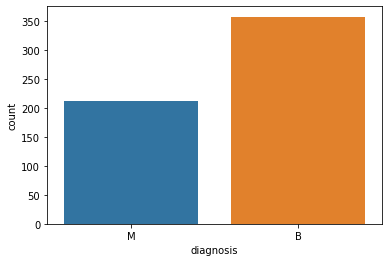

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sb
sb.countplot(ds["diagnosis"],label="count")
gf=sb.pairplot(ds,hue="diagnosis",markers=["o","s"])


In [7]:
from pandas.plotting import scatter_matrix as sm
from matplotlib import cm
x=ds.iloc[:,1:32]
y=ds.iloc[:,0]
print(y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


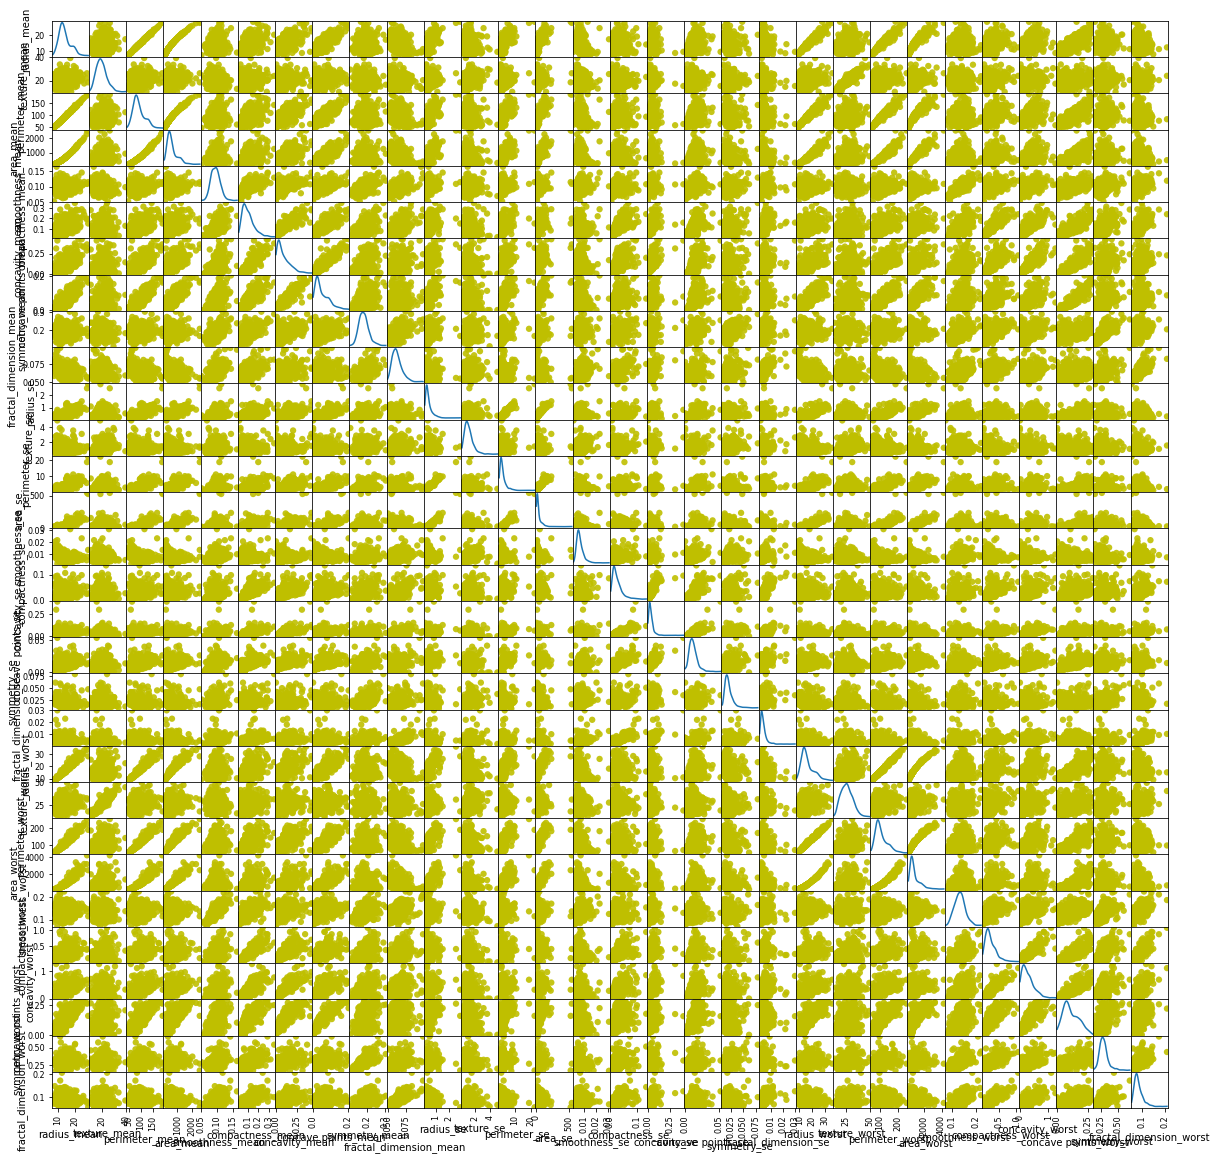

In [ ]:
import random
scatter=sm(x,marker="o",s=40,diagonal="kde",figsize=(20,20),alpha=0.9,c=[i for i in random.choice(["r","g","b","y"])])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(398, 30)
(398,)
(171, 30)
(171,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression().fit(x_train,y_train)
print("Accuracy of Logistic Regression is {:.2f}".format(model_lr.score(x_test,y_test)))

Accuracy of Logistic Regression is 0.98
